In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('https://dc-edu.itmo.ru/assets/courseware/v1/fed9823d73d2b53f5591d98b87c20b8a/asset-v1:ITMO+DS+2024+type@asset+block/fish_train.csv')

In [ ]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550
...,...,...,...,...,...,...,...
114,Parkki,273.0,23.0,25.0,28.0,11.0880,4.1440
115,Pike,500.0,42.0,45.0,48.0,6.9600,4.8960
116,Whitefish,1000.0,37.3,40.0,43.5,12.3540,6.5250
117,Perch,120.0,20.0,22.0,23.5,6.1100,3.4075


Определения:
Тренировочные данные (обучающие данные, X_train, y_train):

Это подмножество данных, которое используется для обучения модели.

Модель "видит" эти данные и пытается найти закономерности, которые позволят ей делать предсказания.

X_train содержит признаки (features), на основе которых модель будет обучаться.

y_train содержит целевые значения (labels), которые модель пытается предсказать.

Тестовые данные (X_test, y_test):

Это другое подмножество данных, которое модель не "видит" во время обучения.

Оно используется для оценки того, насколько хорошо обученная модель может обобщать свои знания на новых данных.

X_test содержит признаки, на основе которых модель будет делать предсказания.

y_test содержит истинные значения, с которыми предсказания модели будут сравниваться для оценки её качества.

Код:
python
Copy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=df['Species'])
Разбор кода:
train_test_split: Это функция из библиотеки sklearn.model_selection, которая разделяет данные на тренировочные и тестовые наборы.

X: Матрица признаков (features), которые используются для обучения модели.

y: Вектор целевых значений (labels), которые модель пытается предсказать.

test_size=0.2: Указывает, что 20% данных будут использоваться для тестирования, а 80% — для обучения.

random_state=random_state: Задает начальное состояние генератора случайных чисел, чтобы разделение данных было воспроизводимо.

stratify=df['Species']: Этот параметр обеспечивает, чтобы распределение классов в тренировочных и тестовых наборах было таким же, как в исходном наборе данных. Это особенно важно, если данные несбалансированы.

Результат:
X_train: Признаки для обучения модели.

X_test: Признаки для тестирования модели.

y_train: Целевые значения для обучения модели.

y_test: Истинные значения для оценки качества модели.

Таким образом, после выполнения этой строки кода у вас будут готовые наборы данных для обучения и тестирования модели.



Разделение данных:

80% для обучения: Эти данные используются для того, чтобы модель могла "научиться" предсказывать целевые значения на основе признаков.

20% для тестирования: Эти данные используются для оценки того, насколько хорошо модель обобщает свои знания на новых данных, которые она не видела во время обучения.

Цель тестовой выборки:

Тестовая выборка нужна для оценки качества модели. Она позволяет увидеть, насколько точно модель может предсказывать на новых данных, которые она не видела во время обучения.

Тестовая выборка не используется для обучения модели. Она нужна только для проверки, и её нельзя смешивать с тренировочными данными.

Экономия ресурсов:

Уменьшение данных: Да, использование меньшего количества данных может снизить затраты на хранение и обработку данных. Однако важно помнить, что качество модели сильно зависит от объёма и качества данных, на которых она обучается.

Тестовая выборка не заменяет тренировочную: Тестовая выборка не может заменить тренировочную. Она нужна только для оценки, а не для обучения.

Практические рекомендации:
Обучение на 80%, тестирование на 20%: Это стандартное соотношение, которое обычно используется для баланса между обучением и тестированием.

Кросс-валидация: Для более надёжной оценки качества модели можно использовать кросс-валидацию (cross-validation), которая позволяет использовать все данные как для обучения, так и для тестирования, но в разных комбинациях.

Размер данных: Важно найти баланс между объёмом данных и качеством модели. Слишком мало данных может привести к переобучению (overfitting) или недообучению (underfitting).

Заключение:
Тестовая выборка нужна для оценки качества модели, но не для обучения.

Уменьшение данных может снизить затраты, но важно не потерять в качестве модели.

Кросс-валидация может быть полезной для более надёжной оценки модели.

Таким образом, хотя уменьшение данных может снизить затраты, важно помнить о балансе между объёмом данных и качеством модели. Тестовая выборка не заменяет тренировочную и используется только для оценки.

Основные моменты:
Разделение данных:

train_test_split: Это функция из библиотеки sklearn.model_selection, которая разделяет данные на две части: обучающую и тестовую выборки.

X: Матрица признаков (features), которые используются для обучения модели.

y: Вектор целевых значений (labels), которые модель пытается предсказать.

Параметры функции:

test_size=0.2: Указывает, что 20% данных будут использоваться для тестирования, а 80% — для обучения.

random_state=random_state: Задает начальное состояние генератора случайных чисел, чтобы разделение данных было воспроизводимо.

stratify=df['Species']: Этот параметр обеспечивает, чтобы распределение классов в тренировочных и тестовых наборах было таким же, как в исходном наборе данных. Это особенно важно, если данные несбалансированы.

Результат:
X_train: Признаки для обучения модели.

X_test: Признаки для тестирования модели.

y_train: Целевые значения для обучения модели.

y_test: Истинные значения для оценки качества модели.

Пример кода:
python
Copy
from sklearn.model_selection import train_test_split

# Предположим, у нас есть данные X и y
X = ...  # Матрица признаков
y = ...  # Вектор целевых значений
random_state = 42  # Пример значения для random_state

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=df['Species'])
Объяснение:
Разделение данных:

80% данных будут использоваться для обучения модели (X_train, y_train).

20% данных будут использоваться для тестирования модели (X_test, y_test).

Цель тестовой выборки:

Тестовая выборка нужна для оценки того, насколько хорошо модель обобщает свои знания на новых данных, которые она не видела во время обучения.

Тестовая выборка не используется для обучения модели. Она нужна только для проверки, и её нельзя смешивать с тренировочными данными.

Заключение:
функции train_test_split данные разделяются на обучающую и тестовую выборки.

В тестовую выборку отправляется 20% данных, как указано в параметре test_size=0.2.

Тестовая выборка используется для оценки того, насколько хорошо модель обучилась и может предсказывать на новых данных.

Таким образом, разделение данных на обучающую и тестовую выборки — это важный шаг в процессе машинного обучения, который позволяет оценить качество модели на новых данных.

In [ ]:
random_state = 9


X, y = df.drop('Weight', axis=1), df.Weight

# ДАЛЕЕ ПОУЧАЕМ ТРЕНИРОВОЧНУЮ(ОБУЧАЮЩУЮ) X_train, X_test И ТЕСТОВУЮ ВЫБОРКУ (y_train, y_test)
# stratify НУДНА ДЛЯ ТОГО ЧТОБЫ РАЗДЕЛЕНИЕ РЫБПРОИЗВОШЛО ПО ВЫБОКРАМ ОДИНАКОВО

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=df['Species'])

Введите выборочное среднее колонки Width полученной тренировочной выборки.

In [ ]:
print(round(X_train.Width.mean(),3))

4.435


In [ ]:
X_train

,Species,Length1,Length2,Length3,Height,Width
24,Bream,28.7,31.0,36.2,14.3714,4.8146
72,Roach,29.5,31.7,35.0,9.4850,5.3550
46,Roach,18.2,19.8,22.2,5.6166,3.1746
55,Pike,44.8,48.0,51.2,7.6800,5.3760
36,Smelt,11.3,11.8,13.1,2.2139,1.2838
...,...,...,...,...,...,...
35,Pike,48.3,51.7,55.1,8.9262,6.1712
79,Perch,25.4,27.5,28.9,7.0516,4.3350
49,Parkki,19.8,21.5,24.1,9.7364,3.1571
47,Bream,26.3,29.0,33.5,12.7300,4.4555


1. Построение базовой модели
Избавьтесь от категориальных признаков и обучите модель линейной регрессии (LinearRegression()) на тренировочном наборе данных. Выполните предсказания для тестового набора данных. Оцените модель при помощи метрики r2_score().

округление до 1000
round(r2_score(y_test, model_basic.predict(X_test.drop(['Species'], axis=1))),3)

ТУТ КАК РАЗ МЫ И ПРОВЕРЯЕМ НАСКОЛЬКО ХОРОШО ОБУЧИЛАСЬ МОДЕЛЬ НА ОБУЧАЮЩИХ ДАННЫХ.

ПРИЧЕМ МЫ ТУТ ТАКЖЕ ИЗБАВИИСЬ ОТ КАТЕГОРИЙНЫХ ПРИЗНАКОВ(СТРОКОВЫХ, НЕЧИСЛОВЫХ)

In [ ]:
model_basic = LinearRegression().fit(X_train.drop(['Species'], axis=1), y_train)  # ВЫЗЫВАЕМ регр НА ТРЕНИРОВОЧНОЙ(ОБУЧАЮЩЕЙ) ВЫБОРКЕ без строковых признаков
r2_score(y_test, model_basic.predict(X_test.drop(['Species'], axis=1)))

# ОБУЧЕНИЕ ПРОШЛО НОРМАЛЬНО ВЫСОКИЙ ПОКАЗАТЕЛЬ

0.8394105176747895

2. Добавление предварительной обработки признаков.

При помощи, например, sns.heatmap(), постройте матрицу корреляций признаков тренировочного набора данных и определите тройку наиболее коррелированных между собой признаков.

In [ ]:
# Если в наборе данных могут быть другие нечисловые столбцы, можно использовать фильтрацию данных для автоматического исключения всех нечисловых столбцов:
# Оставляем только числовые столбцы
#numeric_cols = X_train.select_dtypes(include=[np.number])

# Построение корреляционной матрицы
#corr_matrix = numeric_cols.corr()

# Построение тепловой карты
#sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)


<Axes: >

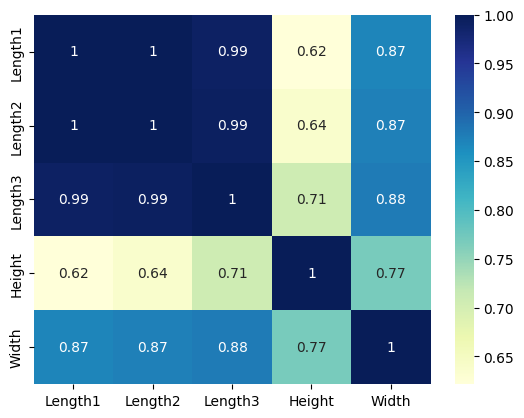

In [ ]:
# Удаляем нечисловые столбцы, такие как 'Species'
corr_matrix = X_train.drop(['Species'], axis=1).corr()   # МЕТОД ПОЗВОЛЯЕТ ОПРЕДЕЛИТЬ ПРИЗНАКИ КОРРЕЛИРОВАННЫЕ, У НАС ТУТ ТРИ ПРИЗНАКА, ОСТАЛЬНЫЕ МОЖНО ВЫКИНУТЬ

# Построение тепловой карты
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)


Для уменьшения количества неинформативных измерений используйте метод главных компонент.

1) Примените метод главных компонент (PCA(n_components=3, svd_solver='full')) для трех найденных наиболее коррелированных признаков.

2) Вычислите долю объясненной дисперсии при использовании только первой главной компоненты.

3) Замените три наиболее коррелированных признака на новый признак Lengths, значения которого совпадают со значениями счетов первой главной компоненты.

lengths = X_train[['Length1', 'Length2', 'Length3']]
pca = PCA(n_components=3, svd_solver = 'full').fit(lengths)
X_train = X_train.drop(['Length1', 'Length2', 'Length3'], axis = 1)  

n_components=3 НА ТРЕХ ОБУЧАЕМ, ХОТЯ МОЖНО И НА 1 И 2 ОБУЧАТЬ


X_train['Lengths'] = pca.transform(lengths)[:,0]                     # ТУТ МЫ БЕРЕМ ОДНУ ГК С ПОМОЩЬЮ [:,0]


print('Доля объясненной дисперсии первой ГК: ', pca.explained_variance_ratio_[0])


lengths = X_train[['Length1', 'Length2', 'Length3']] — здесь мы выбираем столбцы 'Length1', 'Length2', 'Length3' как список столбцов.

Применение PCA:

pca = PCA(n_components=1, svd_solver='full').fit(lengths) — здесь мы обучаем PCA на выбранных столбцах.

Удаление исходных столбцов:

X_train = X_train.drop(['Length1', 'Length2', 'Length3'], axis=1) — здесь мы удаляем исходные столбцы из датафрейма.

Добавление первой главной компоненты:

X_train['Lengths'] = pca.transform(lengths)[:, 0] — здесь мы добавляем первую главную компоненту (результат PCA) в качестве нового столбца в датафрейм.

Вывод доли объясненной дисперсии:

print('Доля объясненной дисперсии первой ГК: ', pca.explained_variance_ratio_[0]) — здесь мы выводим долю объясненной дисперсии первой главной компоненты.

In [ ]:
lengths = X_train[['Length1', 'Length2', 'Length3']]
pca = PCA(n_components=3, svd_solver = 'full').fit(lengths)
X_train = X_train.drop(['Length1', 'Length2', 'Length3'], axis = 1)  # n_components=3 НА ТРЕХ ОБУЧАЕМ, ХОТЯ МОЖНО И НА 1 И 2 ОБУЧАТЬ
X_train['Lengths'] = pca.transform(lengths)[:,0]                     # ТУТ МЫ БЕРЕМ ОДНУ ГК С ПОМОЩЬЮ [:,0]
print('Доля объясненной дисперсии первой ГК: ', pca.explained_variance_ratio_[0])    # результат показал- что на 1 ГК мы не потеряли ничего на данных

Доля объясненной дисперсии первой ГК:  0.9960262957484168


Примените полученное преобразование для тех же признаков в тестовом наборе данных. Обратите внимание, что заново обучать преобразование PCA не нужно. Аналогично предыдущему этапу замените три рассмотренных признака на один.

In [ ]:
lengths_test = X_test[['Length1', 'Length2', 'Length3']]
X_test = X_test.drop(['Length1', 'Length2', 'Length3'], axis = 1)
X_test['Lengths'] = pca.transform(lengths_test)[:,0]

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи r2_score().

ТУТ КАК РАЗ МЫ И СМОТРИМ НАСКОЛКЬО ОУБЧИЛАСЬ МОДЕЛЬЗАКИНУВЫ ОБУЧАЮЩИЕ ДАННЫЕ В РЕГЕРЕССИЮ И СМОТРИМ ОТНОШЕНИЕ - ОШИБКУ МЕЖДУ ОБУЧАЮЩИМИ И ТЕСТОВЫМИ ДАННЫМИ, КОТОРЫЕ СООТВЕТСТВУЮТ 20%

In [ ]:
model_basic = LinearRegression().fit(X_train.drop(['Species'], axis=1), y_train)
r2_score(y_test, model_basic.predict(X_test.drop(['Species'], axis=1)))

0.8325393528547269

Видно, что точность значительно не изменилась.

Модификация признаков

Постройте графики зависимостей признаков от целевой переменной, например, при помощи sns.pairplot().

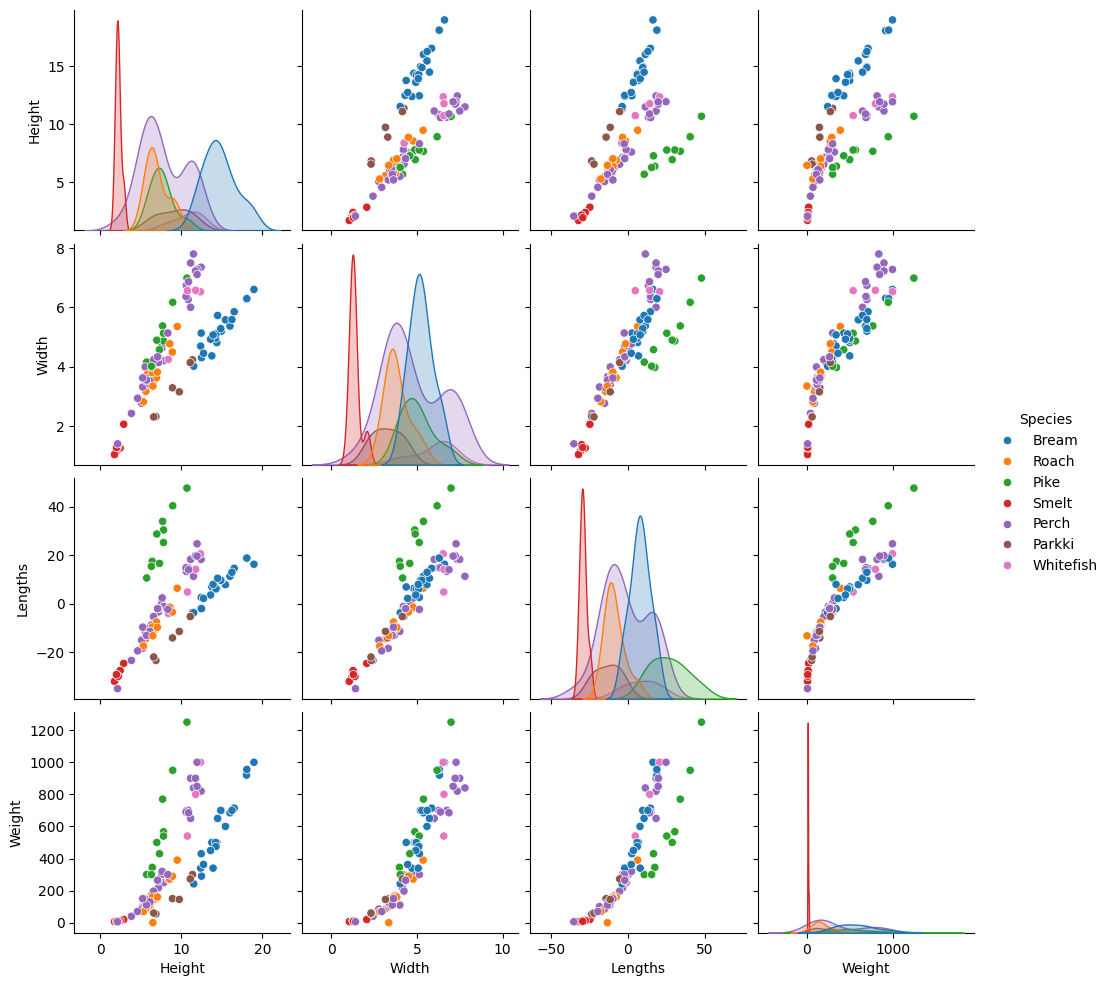

In [ ]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='Species')

Видно, что масса, вообще говоря, нелинейно зависит от остальных параметров. Значит, чтобы линейная модель хорошо справлялась с предсказанием, признаки имеет смысл преобразовать так, чтобы зависимость стала более похожей на линейную. Но как придумать такую зависимость?

Логично предположить, что масса рыбы должна каким-то гладким образом зависеть от остальных параметров, отвечающих так или иначе за размеры. Если впомнить, что масса — это произведение плотности на объем, то

m=ρ⋅V.

Допустим, что средняя плотность у всех рыб одинаковая, и вспомним, что при гомотетии объем объекта зависит от линейных размеров как куб, тогда получим

m∼V∼d3

Все признаки тренировочного и тестового наборов данных, отвечающие так или иначе за размеры (Height, Width, Lenghts), возведите в третью степень, и проверьте, стала ли зависимость массы от этих признаков похожа на линейную.

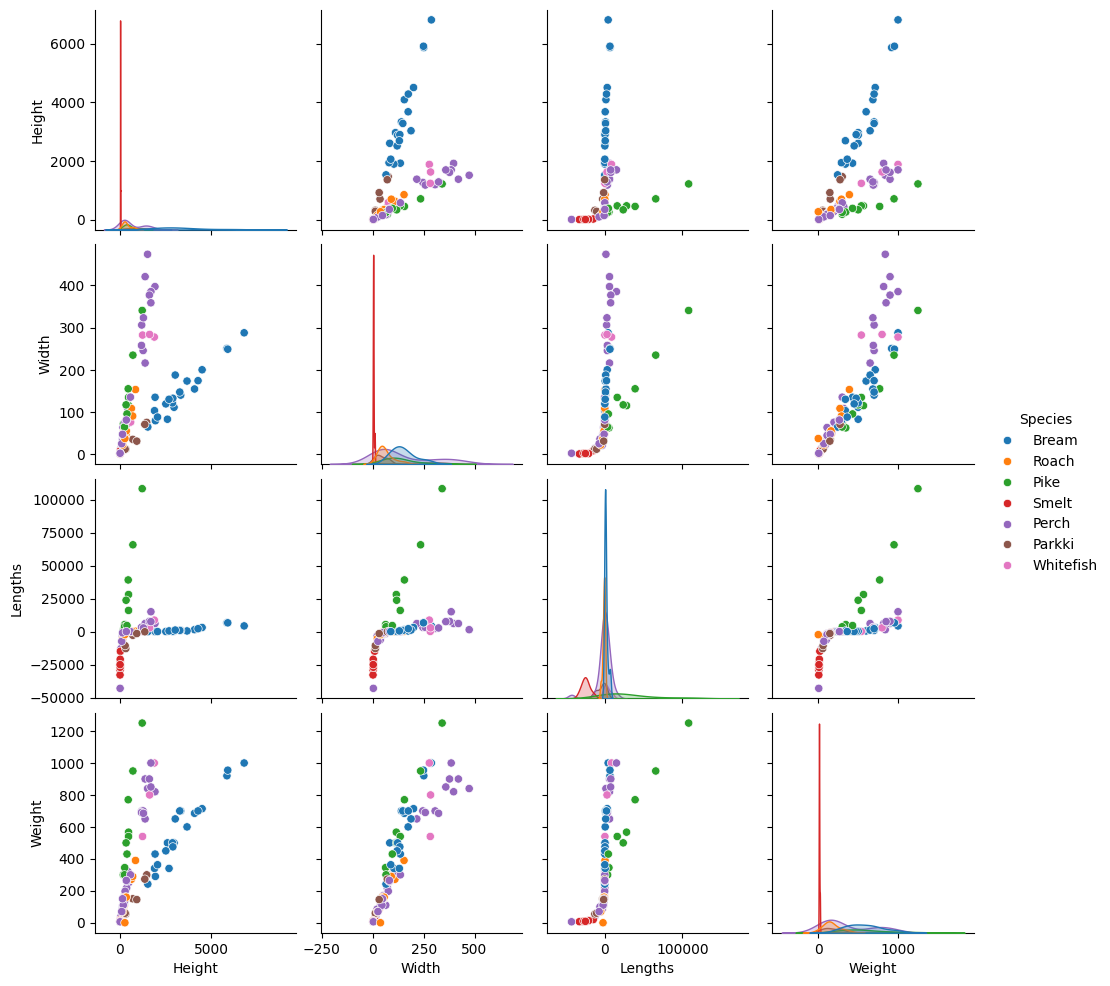

In [ ]:
X_train_not_cube = X_train.copy()
X_test_not_cube = X_test.copy()
X_train[['Height', 'Width', 'Lengths']] = X_train[['Height', 'Width', 'Lengths']] ** 3
X_test[['Height', 'Width', 'Lengths']] = X_test[['Height', 'Width', 'Lengths']] ** 3
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='Species')

Введите выборочное среднее колонки Width тренировочного набора данных после возведения в куб.



In [ ]:
X_train.Width.mean()
round(X_train.Width.mean(),3)

121.365

Выберите изображения, соответствующие зависимости Weight от Width до преобразования и после.

Обучите базовую модель линейной регресси на полученных тренировочных данных, снова выбросив категориальные признаки. Выполните предсказания для тестовых данных, оцените при помощи r2_score().

In [ ]:
model_basic = LinearRegression().fit(X_train.drop(['Species'], axis=1), y_train)
r2_score(y_test, model_basic.predict(X_test.drop(['Species'], axis=1)))

0.9433940174256775

Обратите внимание на то, как такая нехитрая работа с признаками помогла разительно улучшить точность модели!

Добавление категориальных признаков

In [ ]:
X_train.head()

,Species,Height,Width,Lengths
24,Bream,2968.227824,111.604225,246.660404
72,Roach,853.320159,153.560114,256.877230
46,Roach,177.182362,31.993889,-3019.823898
55,Pike,452.984832,155.373797,39099.343371
36,Smelt,10.851106,2.115885,-22855.688666


Произведите one-hot кодировние категориального признака Species, например, с помощью pd.get_dummies().

Обучите модель линейной регресси на полученных тренировочных данных. Выполните предсказания для тестовых данных, оцените модель при помощи r2_score().

Примечание: Мы специально использовали стратифицированное разделение, чтобы все значения категориального признака Species присутствовали во всех наборах данных. Но такое возможно не всегда. Про то, как с этим бороться можно почитать, например, здесь. https://www.google.com/url?q=https%3A%2F%2Fpredictivehacks.com%2F%3Fall-tips%3Dhow-to-deal-with-get_dummies-in-train-and-test-dataset

In [ ]:
import pandas as pd

X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)
X_train_dummies

,Height,Width,Lengths,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
24,2968.227824,111.604225,246.660404,True,False,False,False,False,False,False
72,853.320159,153.560114,256.877230,False,False,False,False,True,False,False
46,177.182362,31.993889,-3019.823898,False,False,False,False,True,False,False
55,452.984832,155.373797,39099.343371,False,False,False,True,False,False,False
36,10.851106,2.115885,-22855.688666,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
35,711.213252,235.022188,65718.399109,False,False,False,True,False,False,False
79,350.641251,81.464295,-8.357202,False,False,True,False,False,False,False
49,922.986233,31.467701,-1498.974516,False,True,False,False,False,False,False
47,2062.933417,88.448270,10.155149,True,False,False,False,False,False,False


In [ ]:
model_basic = LinearRegression().fit(X_train_dummies, y_train)
r2_score(y_test, model_basic.predict(X_test_dummies))

0.9323678887715399

И снова точность возрасла.

Как можно увидеть, после one-hot кодирования признаки стали коррелированы. От этого можно избавиться, например, при помощи параметра drop_first=True

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train

,Height,Width,Lengths,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
24,2968.227824,111.604225,246.660404,False,False,False,False,False,False
72,853.320159,153.560114,256.877230,False,False,False,True,False,False
46,177.182362,31.993889,-3019.823898,False,False,False,True,False,False
55,452.984832,155.373797,39099.343371,False,False,True,False,False,False
36,10.851106,2.115885,-22855.688666,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
35,711.213252,235.022188,65718.399109,False,False,True,False,False,False
79,350.641251,81.464295,-8.357202,False,True,False,False,False,False
49,922.986233,31.467701,-1498.974516,True,False,False,False,False,False
47,2062.933417,88.448270,10.155149,False,False,False,False,False,False


In [ ]:
model_basic = LinearRegression().fit(X_train_dummies, y_train)
r2_score(y_test, model_basic.predict(X_test_dummies))

0.9323678887715399

На таком сравнительно небольшом наборе данных, впрочем, разницы мы не видим.

После того как вы обучили модель и оценили её качество на тестовой выборке, следующим шагом будет применение модели для прогнозирования на новых данных. Давайте разберем этот процесс подробнее.

Этапы после обучения модели:
Оценка качества модели:

Вы уже оценили модель на тестовой выборке и убедились, что она хорошо предсказывает. Это важный шаг, чтобы убедиться, что модель не переобучена и может обобщаться на новых данных.

Сохранение модели:

После того как модель обучена и проверена, её можно сохранить для дальнейшего использования. Это можно сделать с помощью библиотеки joblib или pickle.

import joblib

# Сохранение модели

joblib.dump(model, 'sales_prediction_model.pkl')

Загрузка модели и предсказание на новых данных:

Когда у вас появятся новые данные (например, данные по продажам за следующий месяц), вы можете загрузить сохраненную модель и использовать её для предсказания.


# Загрузка модели
model = joblib.load('sales_prediction_model.pkl')

# Новые данные
new_data = ...  # Матрица признаков для новых данных

# Предсказание на новых данных
predictions = model.predict(new_data)

Визуализация результатов:

Можно построить графики для визуализации предсказаний модели. Например, можно сравнить предсказанные значения с реальными данными.

import matplotlib.pyplot as plt

# Предположим, у вас есть реальные данные по продажам за следующий месяц
actual_sales = ...  # Реальные данные по продажам

# График предсказаний и реальных данных
plt.figure(figsize=(10, 6))
plt.plot(actual_sales, label='Actual Sales')
plt.plot(predictions, label='Predicted Sales')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.show()
Анализ и интерпретация результатов:

После получения предсказаний и их визуализации, важно проанализировать, насколько хорошо модель работает на новых данных. Вы можете использовать метрики качества (например, MSE, MAE) для количественной оценки точности предсказаний.


from sklearn.metrics import mean_squared_error, mean_absolute_error

# Вычисление метрик качества
mse = mean_squared_error(actual_sales, predictions)
mae = mean_absolute_error(actual_sales, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')

Заключение:

Обучение и оценка модели: Сначала вы обучаете модель на исторических данных и оцениваете её качество на тестовой выборке.

Сохранение модели: После того как модель проверена, её можно сохранить для дальнейшего использования.

Предсказание на новых данных: Когда у вас появятся новые данные, вы загружаете сохраненную модель и используете её для предсказания.

Визуализация и анализ: После получения предсказаний, вы можете построить графики и проанализировать, насколько хорошо модель работает на новых данных.

Таким образом, после того как модель обучена и проверена, вы можете использовать её для предсказания на новых данных и визуализировать результаты для анализа.

она будет храниться после этого кода : import joblib


# Сохранение модели
joblib.dump(model, 'sales_prediction_model.pkl')
Модель будет сохранена в текущей рабочей директории, откуда вы запускаете код.

разберем это подробнее:

Где будет храниться модель:
Локальная файловая система:

Если запускаете код на своем компьютере (например, в Jupyter Notebook или в обычном Python скрипте), то модель будет сохранена в текущей рабочей директории вашего проекта.

Вы можете узнать текущую рабочую директорию с помощью команды:

import os
print(os.getcwd())
Google Colab:

Если вы запускаете код в Google Colab, то модель будет сохранена в виртуальной файловой системе Google Colab.

Вы можете увидеть сохраненный файл в левой панели Google Colab, где отображаются файлы.

Проверка сохранения модели:
Локальная файловая система:

Вы можете проверить наличие файла sales_prediction_model.pkl в текущей рабочей директории с помощью команды:


import os
print(os.listdir())
Если файл присутствует в списке, значит модель успешно сохранена.

Google Colab:

Вы можете проверить наличие файла в левой панели Google Colab, где отображаются файлы.

Также вы можете использовать команду:


from google.colab import files
files.view('sales_prediction_model.pkl')

Название файла:
Придумывание названия:

название файла sales_prediction_model.pkl вы придумываете сами. Это может быть любое имя, которое вам удобно.

Расширение .pkl (или .joblib) используется для обозначения файлов, сохраненных с помощью joblib или pickle.

Загрузка модели:
Загрузка модели:

Когда вам нужно использовать модель для предсказаний, вы можете загрузить её с помощью команды:

model = joblib.load('sales_prediction_model.pkl')
Заключение:
Сохранение модели: Модель сохраняется в текущей рабочей директории, откуда вы запускаете код.

Проверка сохранения: Вы можете проверить наличие файла в текущей директории или в Google Colab.

Название файла: Вы сами выбираете название файла, но обычно используются расширения .pkl или .joblib.

Таким образом, после сохранения модели вы можете убедиться, что она сохранена в нужном месте, и использовать её для предсказаний на новых данных.